## Interactive Altair Visualizations of the Stock Market (using yfinance Library)

This project demonstrates advanced interactive data visualization techniques for 
financial market analysis using Altair and Python. The visualizations range from 
comparative performance tracking to technical analysis tools, enabling investors 
and analysts to explore stock data through multiple lenses. Each visualization 
uses Altair's declarative grammar of graphics to create responsive, 
interactive charts that reveal insights about price movements, volatility, 
trading volume, and correlation patterns across major tech stocks.

The project emphasizes interactivity through features like brushing, zooming, 
hover tooltips, dropdown selectors, and click-based filtering - allowing users 
to explore data dynamically rather than viewing static images. Whether you're 
conducting portfolio analysis, performing technical analysis, or preparing 
investor presentations, these visualizations provide professional-grade tools 
for understanding market behavior.

TABLE OF CONTENTS
================================================================================

    1. create_stock_comparison(df)
       - Normalized Performance Comparison
       
    2. create_brush_zoom_with_volume(df, ticker)
       - Multi-Panel Technical Analysis with Brush Selection
       
    3. create_metric_selector(df)
       - Dropdown-Based Metric Explorer
       
    4. create_click_comparison(df)
       - Interactive Click-to-Filter with Statistics
       
    5. create_full_dashboard(df, default_ticker)
       - Comprehensive Multi-View Dashboard

    6. create_correlation_heatmap(df)
       - Portfolio Diversification Analysis
       
    7. create_candlestick_chart(df, ticker, days)
       - OHLC Chart with Bollinger Bands
       
    8. create_volume_profile(df, ticker)
       - Horizontal Volume Distribution by Price Level
       
    9. create_annotated_performance(df, events)
       - Performance Chart with Event Markers

In [2]:
#!pip install altair
#!pip install --upgrade yfinance
!pip install --upgrade yfinance
import yfinance as yf
print(yf.__version__)

0.2.66


In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import altair as alt
from datetime import datetime, timedelta

# Enable proper rendering
alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

def fetch_stock_data(tickers, period='2y'):
    """
    Fetch stock data for multiple tickers
    
    Parameters:
    - tickers: list of stock symbols
    - period: time period (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max)
    """
    all_data = []
    
    for ticker in tickers:
        print(f"Fetching {ticker}...")
        stock = yf.Ticker(ticker)
        df = stock.history(period=period)
        df['Ticker'] = ticker
        df['Date'] = df.index
        df = df.reset_index(drop=True)
        all_data.append(df)

    # Add delay between requests (important!)
       # time.sleep(2)  # Wait 2 seconds between each ticker
    
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Calculate daily returns
    combined_df['Daily_Return'] = combined_df.groupby('Ticker')['Close'].pct_change() * 100
    
    # Calculate moving averages
    combined_df['MA_20'] = combined_df.groupby('Ticker')['Close'].transform(
        lambda x: x.rolling(window=20, min_periods=1).mean()
    )
    combined_df['MA_50'] = combined_df.groupby('Ticker')['Close'].transform(
        lambda x: x.rolling(window=50, min_periods=1).mean()
    )
    
    # Calculate volatility (20-day rolling standard deviation of returns)
    combined_df['Volatility'] = combined_df.groupby('Ticker')['Daily_Return'].transform(
        lambda x: x.rolling(window=20, min_periods=1).std()
    )
    
    # Normalize prices to percentage change from start (for comparison)
    combined_df['Normalized_Price'] = combined_df.groupby('Ticker')['Close'].transform(
        lambda x: ((x / x.iloc[0]) - 1) * 100
    )
    
    return combined_df

# Fetch data for major tech stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
#tickers = ['AAPL', 'GOOGL', 'AMZN']

stock_data = fetch_stock_data(tickers, period='2y')
#stock_data = fetch_stock_data(tickers, period='1mo')

print(f"Data fetched: {len(stock_data)} rows")
stock_data.head()

Fetching AAPL...
Fetching MSFT...
Fetching GOOGL...
Fetching AMZN...
Fetching META...
Data fetched: 2500 rows


Open        High         Low       Close    Volume  Dividends  \
0  188.202603  188.271955  185.696274  187.657745  43389500        0.0   
1  188.430483  192.581270  188.400750  191.610443  66628400        0.0   
2  192.630814  192.937912  190.312710  190.520752  41089700        0.0   
3  191.818488  193.175666  191.778853  192.452499  47477700        0.0   
4  192.383146  194.156408  191.858105  193.879028  53406400        0.0   

   Stock Splits Ticker                      Date  Daily_Return       MA_20  \
0           0.0   AAPL 2023-12-04 00:00:00-05:00           NaN  187.657745   
1           0.0   AAPL 2023-12-05 00:00:00-05:00      2.106333  189.634094   
2           0.0   AAPL 2023-12-06 00:00:00-05:00     -0.568701  189.929647   
3           0.0   AAPL 2023-12-07 00:00:00-05:00      1.013930  190.560360   
4           0.0   AAPL 2023-12-08 00:00:00-05:00      0.741237  191.224094   

        MA_50  Volatility  Normalized_Price  
0  187.657745         NaN          0.000000  
1  189.634094         NaN          2.106333  
2  189.929647    1.891535          1.525653  
3  190.560360    1.344983          2.555053  
4  191.224094    1.099533          3.315228

Use Cell Below if yfinance is not working or you want to use pseudo-data

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Quick sample data - just copy and run this
def create_sample_stock_data():
    """
    Creates realistic sample stock data matching the structure from yfinance
    """
    np.random.seed(42)  # For reproducibility
    
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
    days = 500
    
    all_data = []
    
    for i, ticker in enumerate(tickers):
        # Generate dates
        end_date = datetime.now()
        dates = pd.date_range(end=end_date, periods=days, freq='D')
        
        # Generate realistic price movements
        # Each stock starts at different price and has different volatility
        start_prices = [150, 300, 120, 130, 200]  # Starting prices
        volatilities = [0.02, 0.018, 0.022, 0.025, 0.028]  # Daily volatility
        
        # Random walk for stock prices
        returns = np.random.normal(0.0005, volatilities[i], days)
        prices = start_prices[i] * np.exp(np.cumsum(returns))
        
        # Generate OHLC data
        df = pd.DataFrame({
            'Date': dates,
            'Open': prices * np.random.uniform(0.99, 1.01, days),
            'High': prices * np.random.uniform(1.00, 1.03, days),
            'Low': prices * np.random.uniform(0.97, 1.00, days),
            'Close': prices,
            'Volume': np.random.randint(50000000, 150000000, days),
            'Ticker': ticker
        })
        
        all_data.append(df)
    
    # Combine all stocks
    stock_data = pd.concat(all_data, ignore_index=True)
    
    # Calculate derived metrics (matching the real data structure)
    stock_data['Daily_Return'] = stock_data.groupby('Ticker')['Close'].pct_change() * 100
    
    stock_data['MA_20'] = stock_data.groupby('Ticker')['Close'].transform(
        lambda x: x.rolling(window=20, min_periods=1).mean()
    )
    
    stock_data['MA_50'] = stock_data.groupby('Ticker')['Close'].transform(
        lambda x: x.rolling(window=50, min_periods=1).mean()
    )
    
    stock_data['Volatility'] = stock_data.groupby('Ticker')['Daily_Return'].transform(
        lambda x: x.rolling(window=20, min_periods=1).std()
    )
    
    stock_data['Normalized_Price'] = stock_data.groupby('Ticker')['Close'].transform(
        lambda x: ((x / x.iloc[0]) - 1) * 100
    )
    
    return stock_data

# Generate the data
#stock_data = create_sample_stock_data()
#print(f"Generated {len(stock_data)} rows of data")
#print(f"\nColumns: {list(stock_data.columns)}")
#print(f"\nTickers: {stock_data['Ticker'].unique()}")
#print(f"\nDate range: {stock_data['Date'].min()} to {stock_data['Date'].max()}")
#print("\nFirst few rows:")
#print(stock_data.head(10))

In [27]:
#Run if Jupyter Notebook is having a problem creating Altair Visualizations
#alt.renderers.enable('default')
# OR
#alt.renderers.enable('notebook')

## Interactive Visualization 1: Multi-Stock Price Comparison with Hover Details

PURPOSE: Normalized performance comparison across multiple stocks
   - Shows relative returns from a common starting point (0%)
   - Enables fair comparison of stocks with different price levels
   - Interactive hover reveals exact values and dates
   - Vertical rule helps align data points across stocks
   USE CASE: Quickly identify which stock has best/worst performance over time

In [22]:
def create_stock_comparison(df):
    """
    Interactive line chart comparing multiple stocks with hover tooltips and vertical rule
    """
    # Selection for nearest point
    nearest = alt.selection_point(
        nearest=True,
        on='pointerover',
        fields=['Date'],
        empty=False
    )
    
    # Base line chart showing normalized prices
    line = alt.Chart(df).mark_line(size=2.5).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Normalized_Price:Q',
                axis=alt.Axis(title='Return (%)', grid=True)),
        color=alt.Color('Ticker:N',
                       scale=alt.Scale(scheme='category10'),
                       legend=alt.Legend(title='Stock')),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', title='Date', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', title='Price', format='$.2f'),
            alt.Tooltip('Normalized_Price:Q', title='Return', format='.2f')
        ]
    )
    
    # Transparent selectors for hover
    selectors = alt.Chart(df).mark_point().encode(
        x='Date:T',
        opacity=alt.value(0)
    ).add_params(nearest)
    
    # Points that appear on hover
    when_near = alt.when(nearest)
    points = line.mark_point(size=100, filled=True).encode(
        opacity=when_near.then(alt.value(1)).otherwise(alt.value(0))
    )
    
    # Vertical rule at hover location
    rules = alt.Chart(df).mark_rule(color='gray', strokeWidth=1.5).encode(
        x='Date:T'
    ).transform_filter(nearest)
    
    # Combine all layers
    chart = alt.layer(
        line, selectors, points, rules
    ).properties(
        width=800,
        height=400,
        title='Stock Performance Comparison (Normalized to Starting Price)'
    ).configure_title(
        fontSize=16,
        anchor='start'
    )
    
    return chart

create_stock_comparison(stock_data)

alt.LayerChart(...)

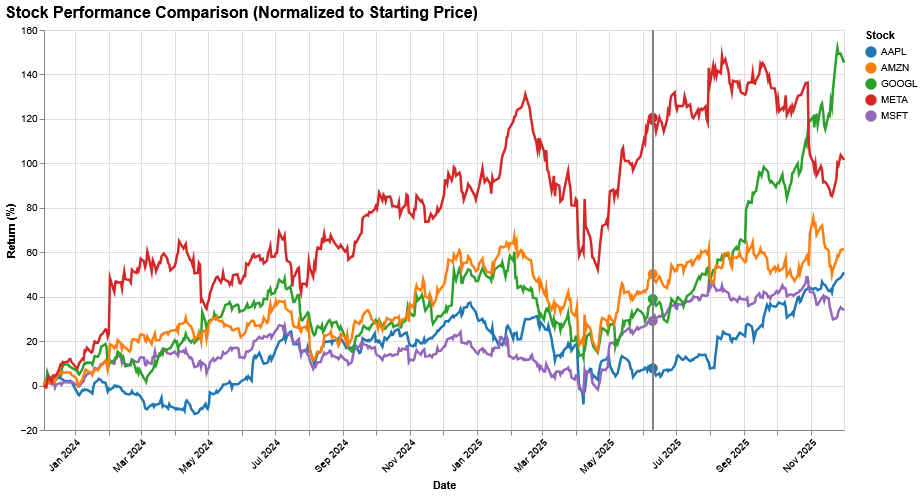

## Interactive Visualization 2: Brush to Zoom with Volume

PURPOSE: Deep dive into single stock with context and detail
   - Top panel: Overview with brush selection for temporal context
   - Middle: Zoomed price view with 20-day and 50-day moving averages
   - Bottom: Volume bars to identify high-activity periods
   - Moving averages help identify trends and potential crossover signals
   USE CASE: Technical analysis, identifying support/resistance levels, 
             correlating price movements with volume spikes

In [23]:
def create_brush_zoom_with_volume(df, ticker='AAPL'):
    """
    Two-panel visualization: brush on top chart zooms bottom chart, showing price and volume
    """
    # Filter to single stock
    stock_df = df[df['Ticker'] == ticker].copy()
    
    # Create brush selection
    brush = alt.selection_interval(encodings=['x'])
    
    # Top chart - Overview with brush
    overview = alt.Chart(stock_df).mark_area(
        line={'color': '#4c78a8'},
        color=alt.Gradient(
            gradient='linear',
            stops=[
                alt.GradientStop(color='#4c78a8', offset=0),
                alt.GradientStop(color='white', offset=1)
            ],
            x1=1, x2=1, y1=1, y2=0
        )
    ).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y')),
        y=alt.Y('Close:Q',
                axis=alt.Axis(title='Price ($)')),
        opacity=alt.condition(brush, alt.value(0.7), alt.value(0.3))
    ).add_params(brush).properties(
        width=800,
        height=150,
        title=f'{ticker} - Click and Drag to Select Period'
    )
    
    # Bottom chart - Detail price view
    price_detail = alt.Chart(stock_df).mark_line(
        color='#4c78a8',
        size=2
    ).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %d, %Y', labelAngle=-45)),
        y=alt.Y('Close:Q',
                axis=alt.Axis(title='Price ($)'),
                scale=alt.Scale(zero=False)),
        tooltip=[
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', title='Close', format='$.2f'),
            alt.Tooltip('Volume:Q', title='Volume', format=',')
        ]
    ).transform_filter(brush)
    
    # Moving averages
    ma_20 = alt.Chart(stock_df).mark_line(
        color='orange',
        strokeDash=[5, 5],
        size=1.5
    ).encode(
        x='Date:T',
        y='MA_20:Q'
    ).transform_filter(brush)
    
    ma_50 = alt.Chart(stock_df).mark_line(
        color='red',
        strokeDash=[2, 2],
        size=1.5
    ).encode(
        x='Date:T',
        y='MA_50:Q'
    ).transform_filter(brush)
    
    price_chart = (price_detail + ma_20 + ma_50).properties(
        width=800,
        height=250,
        title='Price with Moving Averages (20-day orange, 50-day red)'
    )
    
    # Bottom chart - Volume
    volume_chart = alt.Chart(stock_df).mark_bar(
        color='#9ecae1'
    ).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='', format='%b %d, %Y', labelAngle=-45)),
        y=alt.Y('Volume:Q',
                axis=alt.Axis(title='Volume', format='.2s')),
        tooltip=[
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Volume:Q', title='Volume', format=',')
        ]
    ).transform_filter(brush).properties(
        width=800,
        height=100
    )
    
    return alt.vconcat(overview, price_chart, volume_chart).resolve_scale(
        x='shared'
    )

create_brush_zoom_with_volume(stock_data, ticker='AAPL')

alt.VConcatChart(...)

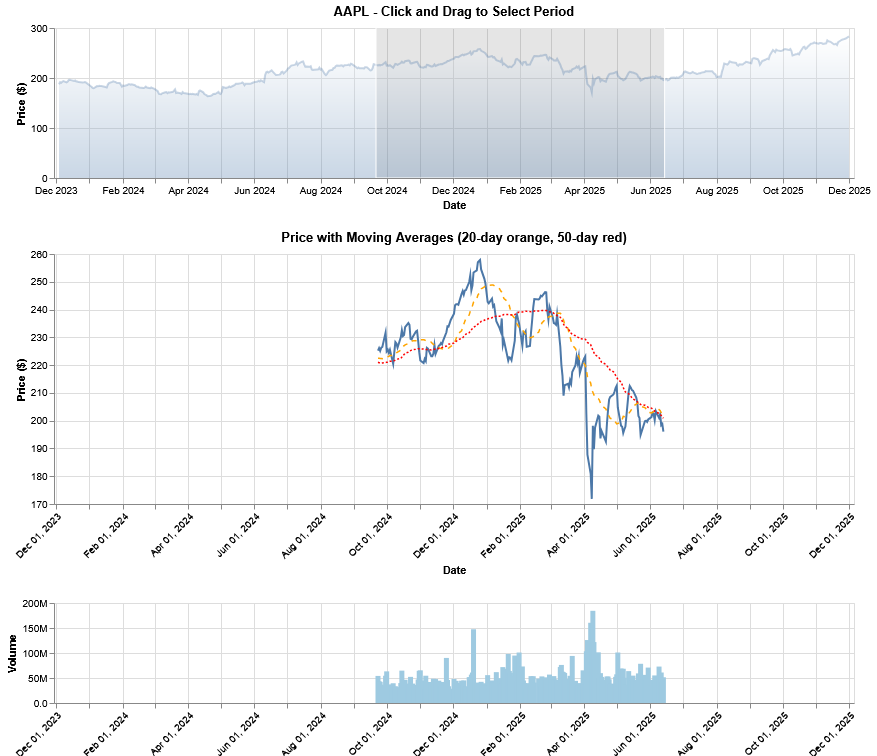

## Interactive Visualization 3: Dropdown Selector with Multi-Metric View

PURPOSE: Flexible metric exploration with single interface
   - Dropdown allows switching between Price, Volume, Volatility, Returns
   - Compare same metric across different stocks
   - Reduces cognitive load by focusing on one metric at a time
   
   USE CASE: When analyzing specific aspects (e.g., "Which stock is most volatile?")

In [24]:
def create_metric_selector(df):
    """
    Dropdown menu to switch between different metrics (Price, Volume, Volatility, Returns)
    """
    # Prepare data
    metrics_df = df.copy()
    
    # Melt data to long format for multiple metrics
    value_vars = {
        'Close': 'Price ($)',
        'Volume': 'Volume',
        'Volatility': 'Volatility (%)',
        'Daily_Return': 'Daily Return (%)'
    }
    
    # Create dropdown options
    metric_options = list(value_vars.values())
    
    # Dropdown binding
    input_dropdown = alt.binding_select(
        options=metric_options,
        name='Select Metric: '
    )
    
    # Selection parameter
    metric_select = alt.selection_point(
        fields=['metric'],
        bind=input_dropdown,
        value='Price ($)'
    )
    
    # Prepare melted dataframe
    melted_df = pd.melt(
        metrics_df,
        id_vars=['Date', 'Ticker'],
        value_vars=list(value_vars.keys()),
        var_name='metric_key',
        value_name='value'
    )
    melted_df['metric'] = melted_df['metric_key'].map(value_vars)
    
    # Create hover selection
    hover = alt.selection_point(
        on='pointerover',
        fields=['Date'],
        nearest=True,
        empty=False
    )
    
    # Base line chart
    lines = alt.Chart(melted_df).mark_line(size=2.5).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('value:Q',
                axis=alt.Axis(title='Value'),
                scale=alt.Scale(zero=False)),
        color=alt.Color('Ticker:N',
                       scale=alt.Scale(scheme='tableau10'),
                       legend=alt.Legend(title='Stock')),
        opacity=alt.condition(hover, alt.value(1), alt.value(0.7)),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('value:Q', title='Value', format='.2f')
        ]
    ).add_params(
        metric_select,
        hover
    ).transform_filter(
        metric_select
    ).properties(
        width=800,
        height=450,
        title='Stock Metrics Comparison - Select metric from dropdown'
    )
    
    return lines

create_metric_selector(stock_data)

alt.Chart(...)

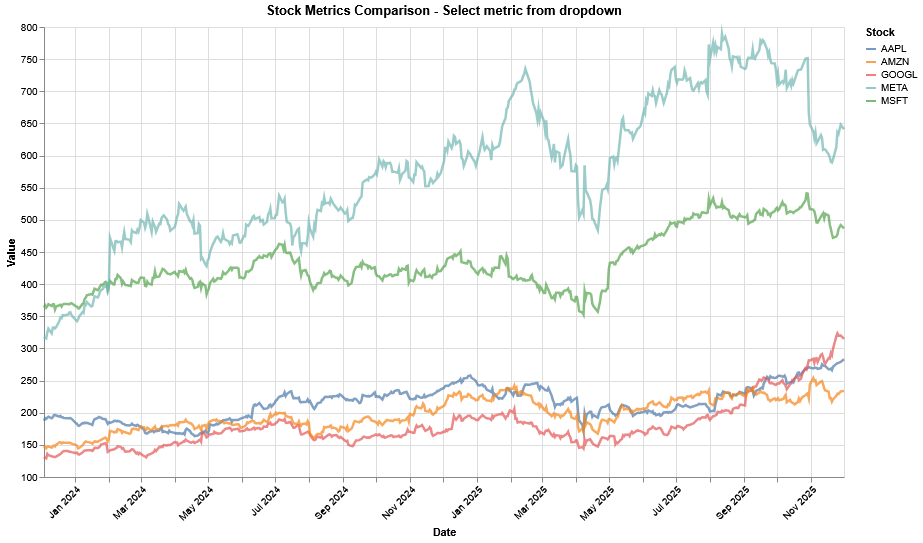

## Interactive Visualization 4: Click to Compare Individual Stocks

PURPOSE: Interactive filtering with summary statistics
   - Click legend to isolate specific stocks
   - View average daily returns and volatility for selected stocks
   - Time-series volatility chart shows risk patterns
     
   USE CASE: Comparing risk/return profiles, identifying stable vs volatile periods

In [25]:
def create_click_comparison(df):
    """
    Click on stocks to highlight them and see individual performance
    """
    # Click selection
    click = alt.selection_point(fields=['Ticker'])
    
    # Color condition
    color = alt.condition(
        click,
        alt.Color('Ticker:N', scale=alt.Scale(scheme='category10'), legend=alt.Legend(title='Stock (Click to highlight)')),
        alt.value('lightgray')
    )
    
    # Main price chart
    price_lines = alt.Chart(df).mark_line(size=3).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Close:Q',
                axis=alt.Axis(title='Price ($)'),
                scale=alt.Scale(zero=False)),
        color=color,
        opacity=alt.condition(click, alt.value(1), alt.value(0.2)),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', title='Price', format='$.2f')
        ]
    ).add_params(
        click
    ).properties(
        width=800,
        height=400,
        title='Stock Prices - Click legend to highlight'
    )
    
    # Summary statistics for selected stock
    stats = alt.Chart(df).mark_bar().encode(
        x=alt.X('Ticker:N', axis=alt.Axis(title='Stock')),
        y=alt.Y('mean(Daily_Return):Q',
                axis=alt.Axis(title='Average Daily Return (%)')),
        color=color,
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('mean(Daily_Return):Q', title='Avg Daily Return', format='.3f'),
            alt.Tooltip('mean(Volatility):Q', title='Avg Volatility', format='.2f')
        ]
    ).transform_filter(
        click
    ).properties(
        width=400,
        height=200,
        title='Average Performance of Selected Stock(s)'
    )
    
    # Volatility chart
    volatility = alt.Chart(df).mark_area(opacity=0.6).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Volatility:Q',
                axis=alt.Axis(title='Volatility (%)')),
        color=color,
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Volatility:Q', title='Volatility', format='.2f')
        ]
    ).transform_filter(
        click
    ).properties(
        width=400,
        height=200,
        title='Volatility Over Time'
    )
    
    bottom_charts = alt.hconcat(stats, volatility)
    
    return alt.vconcat(price_lines, bottom_charts)

create_click_comparison(stock_data)

alt.VConcatChart(...)

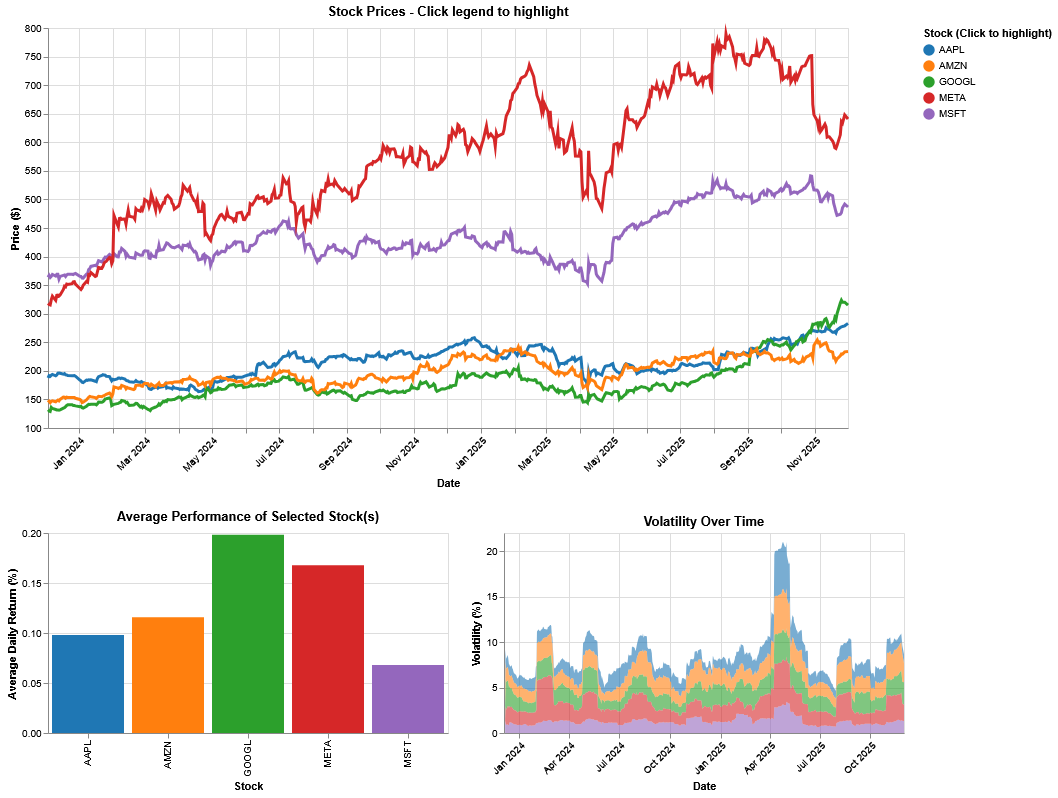

## Visualization 5: Complete Interactive Dashboard

PURPOSE: Comprehensive overview combining multiple perspectives
   - Top: All stocks normalized comparison
   - Middle/Bottom: Single stock detail with brush zoom
   - Provides both macro and micro views in one interface
     
   USE CASE: Presentation-ready dashboard for stakeholder meetings

In [26]:
def create_full_dashboard(df, default_ticker='AAPL'):
    """
    Complete interactive dashboard combining multiple visualizations
    """
    # Filter for default ticker for detail view
    detail_df = df[df['Ticker'] == default_ticker].copy()
    
    # 1. Multi-stock comparison at top
    # Selection for nearest point
    nearest = alt.selection_point(
        nearest=True,
        on='pointerover',
        fields=['Date'],
        empty=False
    )
    
    # Base line chart showing normalized prices
    line = alt.Chart(df).mark_line(size=2.5).encode(
        x=alt.X('Date:T',
                axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Normalized_Price:Q',
                axis=alt.Axis(title='Return (%)', grid=True)),
        color=alt.Color('Ticker:N',
                       scale=alt.Scale(scheme='category10'),
                       legend=alt.Legend(title='Stock')),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', title='Date', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', title='Price', format='$.2f'),
            alt.Tooltip('Normalized_Price:Q', title='Return', format='.2f')
        ]
    )
    
    # Transparent selectors for hover
    selectors = alt.Chart(df).mark_point().encode(
        x='Date:T',
        opacity=alt.value(0)
    ).add_params(nearest)
    
    # Points that appear on hover
    when_near = alt.when(nearest)
    points = line.mark_point(size=100, filled=True).encode(
        opacity=when_near.then(alt.value(1)).otherwise(alt.value(0))
    )
    
    # Vertical rule at hover location
    rules = alt.Chart(df).mark_rule(color='gray', strokeWidth=1.5).encode(
        x='Date:T'
    ).transform_filter(nearest)
    
    # Combine comparison layers
    comparison = alt.layer(
        line, selectors, points, rules
    ).properties(
        width=800,
        height=300,
        title='Stock Performance Comparison (Normalized to Starting Price)'
    )
    
    # 2. Single stock detail with brush
    brush = alt.selection_interval(encodings=['x'])
    
    detail_overview = alt.Chart(detail_df).mark_area(
        line={'color': '#4c78a8'},
        color=alt.Gradient(
            gradient='linear',
            stops=[
                alt.GradientStop(color='#4c78a8', offset=0),
                alt.GradientStop(color='white', offset=1)
            ],
            x1=1, x2=1, y1=1, y2=0
        ),
        opacity=0.7
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title=None, format='%b %Y')),
        y=alt.Y('Close:Q', axis=alt.Axis(title='Price')),
    ).add_params(brush).properties(
        width=800,
        height=100,
        title=f'{default_ticker} Detail - Brush to Zoom'
    )
    
    detail_zoom = alt.Chart(detail_df).mark_line(color='#4c78a8', size=2).encode(
        x=alt.X('Date:T', axis=alt.Axis(format='%b %d', labelAngle=-45)),
        y=alt.Y('Close:Q', axis=alt.Axis(title='Price ($)'), scale=alt.Scale(zero=False)),
        tooltip=[
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', format='$.2f'),
            alt.Tooltip('Volume:Q', format=',')
        ]
    ).transform_filter(brush).properties(
        width=800,
        height=200
    )
    
    # Combine everything - APPLY CONFIG HERE, NOT BEFORE
    dashboard = alt.vconcat(
        comparison,
        detail_overview,
        detail_zoom
    ).configure_title(
        fontSize=14,
        anchor='start'
    ).configure_axis(
        labelFontSize=11,
        titleFontSize=12
    )
    
    return dashboard

# Create the full dashboard
create_full_dashboard(stock_data, default_ticker='AAPL')

alt.VConcatChart(...)

## Visualization 6: Correlation Heatmap

PURPOSE: Understand portfolio diversification and risk
    
    - Shows correlation coefficients between all stock pairs
    - Highly correlated stocks (close to 1.0) move together
    - Negative correlation (close to -1.0) indicates inverse relationship
    - Low correlation suggests diversification benefits
    
    USE CASE: Portfolio construction - identify stocks that don't move in lockstep
              to reduce overall portfolio risk

In [29]:
def create_correlation_heatmap(df):
    """
    Interactive correlation heatmap showing relationships between stocks
    """
    # Calculate correlation matrix
    pivot_returns = df.pivot_table(
        values='Daily_Return', 
        index='Date', 
        columns='Ticker'
    )
    
    corr_matrix = pivot_returns.corr()
    
    # Reshape for Altair
    corr_df = corr_matrix.reset_index().melt(
        id_vars='Ticker', 
        var_name='Ticker2', 
        value_name='Correlation'
    )
    
    # Create heatmap
    heatmap = alt.Chart(corr_df).mark_rect().encode(
        x=alt.X('Ticker:N', axis=alt.Axis(title='Stock', labelAngle=0)),
        y=alt.Y('Ticker2:N', axis=alt.Axis(title='Stock')),
        color=alt.Color(
            'Correlation:Q',
            scale=alt.Scale(scheme='redblue', domain=[-1, 1]),
            legend=alt.Legend(title='Correlation')
        ),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock 1'),
            alt.Tooltip('Ticker2:N', title='Stock 2'),
            alt.Tooltip('Correlation:Q', title='Correlation', format='.3f')
        ]
    ).properties(
        width=400,
        height=400,
        title='Stock Return Correlation Matrix'
    )
    
    # Add text labels
    text = alt.Chart(corr_df).mark_text(baseline='middle').encode(
        x='Ticker:N',
        y='Ticker2:N',
        text=alt.Text('Correlation:Q', format='.2f'),
        color=alt.condition(
            alt.datum.Correlation > 0.5,
            alt.value('white'),
            alt.value('black')
        )
    )
    
    return (heatmap + text).configure_axis(
        labelFontSize=11,
        titleFontSize=12
    )
create_correlation_heatmap(stock_data)

alt.LayerChart(...)

## Visualization 7: Candlestick Chart with Bollinger Bands

PURPOSE: Detailed price action analysis with volatility bands

    - Candlesticks: Show open, high, low, close (OHLC) for each day
    - Green candles: Close > Open (bullish day)
    - Red candles: Close < Open (bearish day)
    - Bollinger Bands: 20-day MA ± 2 standard deviations
    - Price touching upper band: Potentially overbought
    - Price touching lower band: Potentially oversold
    
    USE CASE: Day trading, swing trading, identifying breakout patterns,
              mean reversion opportunities

In [32]:
def create_candlestick_chart(df, ticker='AAPL', days=90):
    """
    Candlestick chart with Bollinger Bands for technical analysis
    
    
    """
    # Filter data
    stock_df = df[df['Ticker'] == ticker].copy().tail(days)
    
    # Calculate Bollinger Bands
    stock_df['BB_Middle'] = stock_df['MA_20']
    rolling_std = stock_df['Close'].rolling(window=20, min_periods=1).std()
    stock_df['BB_Upper'] = stock_df['BB_Middle'] + (2 * rolling_std)
    stock_df['BB_Lower'] = stock_df['BB_Middle'] - (2 * rolling_std)
    
    # Determine candle color
    stock_df['Color'] = stock_df.apply(
        lambda x: 'green' if x['Close'] >= x['Open'] else 'red', axis=1
    )
    
    # Create rules for high-low
    rules = alt.Chart(stock_df).mark_rule().encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date', format='%b %d', labelAngle=-45)),
        y=alt.Y('Low:Q', scale=alt.Scale(zero=False)),
        y2='High:Q',
        color=alt.Color('Color:N', scale=None, legend=None)
    )
    
    # Create bars for open-close
    bars = alt.Chart(stock_df).mark_bar(size=8).encode(
        x='Date:T',
        y='Open:Q',
        y2='Close:Q',
        color=alt.Color('Color:N', 
                       scale=alt.Scale(domain=['green', 'red'], 
                                     range=['#26a69a', '#ef5350']),
                       legend=alt.Legend(title='Direction')),
        tooltip=[
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Open:Q', title='Open', format='$.2f'),
            alt.Tooltip('High:Q', title='High', format='$.2f'),
            alt.Tooltip('Low:Q', title='Low', format='$.2f'),
            alt.Tooltip('Close:Q', title='Close', format='$.2f'),
            alt.Tooltip('Volume:Q', title='Volume', format=',')
        ]
    )
    
    # Bollinger Bands
    bb_upper = alt.Chart(stock_df).mark_line(
        color='purple', strokeDash=[5, 5], size=1
    ).encode(x='Date:T', y='BB_Upper:Q')
    
    bb_middle = alt.Chart(stock_df).mark_line(
        color='blue', size=1.5
    ).encode(x='Date:T', y='BB_Middle:Q')
    
    bb_lower = alt.Chart(stock_df).mark_line(
        color='purple', strokeDash=[5, 5], size=1
    ).encode(x='Date:T', y='BB_Lower:Q')
    
    # Band area
    bb_area = alt.Chart(stock_df).mark_area(
        opacity=0.1, color='purple'
    ).encode(
        x='Date:T',
        y='BB_Upper:Q',
        y2='BB_Lower:Q'
    )
    
    return (bb_area + bb_upper + bb_middle + bb_lower + rules + bars).properties(
        width=800,
        height=400,
        title=f'{ticker} - Candlestick Chart with Bollinger Bands (Last {days} days)'
    ).configure_axis(
        labelFontSize=11,
        titleFontSize=12
    )

create_candlestick_chart(stock_data, ticker='AAPL', days=90)

alt.LayerChart(...)

## Visualization 8: Volume-Weighted Moving Average Breakdown

PURPOSE: Identify support and resistance levels based on volume

    - Shows distribution of volume across different price levels
    - High volume areas: Strong support/resistance (many trades occurred)
    - Low volume areas: Weak zones where price may move quickly through
    - Point of Control (POC): Price level with highest volume
    
    USE CASE: Technical analysis for entry/exit points, understanding where
              institutional interest lies, predicting price behavior

In [41]:
def create_volume_profile(df, ticker='AAPL'):
    """
    Horizontal volume profile showing price levels with most trading activity
    
    
    """
    stock_df = df[df['Ticker'] == ticker].copy()
    
    # Create price bins manually to avoid Interval objects
    min_price = stock_df['Close'].min()
    max_price = stock_df['Close'].max()
    bin_size = (max_price - min_price) / 30
    
    stock_df['Price_Level'] = ((stock_df['Close'] - min_price) // bin_size) * bin_size + min_price + (bin_size / 2)
    
    # Aggregate volume by price level
    volume_profile = stock_df.groupby('Price_Level', observed=False)['Volume'].sum().reset_index()
    volume_profile.columns = ['Price_Level', 'Total_Volume']
    
    # Main price chart
    price_line = alt.Chart(stock_df).mark_line(color='steelblue', size=2).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Close:Q', axis=alt.Axis(title='Price ($)'), scale=alt.Scale(zero=False)),
        tooltip=[
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Close:Q', format='$.2f')
        ]
    ).properties(
        width=500,
        height=400,
        title=f'{ticker} - Price Chart'
    )
    
    # Volume profile (horizontal bars)
    volume_bars = alt.Chart(volume_profile).mark_bar(color='coral').encode(
        x=alt.X('Total_Volume:Q', axis=alt.Axis(title='Total Volume', format='.2s')),
        y=alt.Y('Price_Level:Q', 
                axis=alt.Axis(title='Price Level ($)'),
                scale=alt.Scale(zero=False)),
        tooltip=[
            alt.Tooltip('Price_Level:Q', title='Price Level', format='$.2f'),
            alt.Tooltip('Total_Volume:Q', title='Total Volume', format=',')
        ]
    ).properties(
        width=250,
        height=400,
        title='Volume Profile'
    )
    
    return alt.hconcat(price_line, volume_bars).resolve_scale(y='shared')
create_volume_profile(stock_data, ticker='AAPL')

alt.HConcatChart(...)

## Visualization 9: Comparative Performance with Annotations

PURPOSE: Contextualize stock movements with real-world events

    - Shows normalized performance over time
    - Overlay important dates (earnings, product launches, macro events)
    - Helps understand cause-effect relationships
    
    USE CASE: Investment research, understanding historical price drivers,
              preparing investor presentations

In [42]:
def create_annotated_performance(df, events=None):
    """
    Performance chart with custom event annotations
    
    events: List of dicts with {'date': 'YYYY-MM-DD', 'label': 'Event description'}
    """
    if events is None:
        # Example events - replace with real dates from your analysis period
        events = [
            {'date': '2024-01-15', 'label': 'Market Peak'},
            {'date': '2024-06-01', 'label': 'Tech Selloff'},
            {'date': '2024-09-15', 'label': 'Rate Cut'}
        ]
    
    events_df = pd.DataFrame(events)
    events_df['date'] = pd.to_datetime(events_df['date'])
    
    # Main performance chart
    lines = alt.Chart(df).mark_line(size=2.5).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date', format='%b %Y', labelAngle=-45)),
        y=alt.Y('Normalized_Price:Q', axis=alt.Axis(title='Return (%)', grid=True)),
        color=alt.Color('Ticker:N', scale=alt.Scale(scheme='category10')),
        tooltip=[
            alt.Tooltip('Ticker:N', title='Stock'),
            alt.Tooltip('Date:T', format='%B %d, %Y'),
            alt.Tooltip('Normalized_Price:Q', title='Return %', format='.2f')
        ]
    )
    
    # Event markers (vertical rules)
    event_rules = alt.Chart(events_df).mark_rule(
        color='red', strokeDash=[5, 5], size=2
    ).encode(
        x='date:T',
        tooltip=alt.Tooltip('label:N', title='Event')
    )
    
    # Event labels
    event_text = alt.Chart(events_df).mark_text(
        align='left',
        angle=270,
        dx=5,
        dy=-5,
        fontSize=10,
        fontWeight='bold'
    ).encode(
        x='date:T',
        y=alt.value(10),
        text='label:N',
        color=alt.value('red')
    )
    
    return (lines + event_rules + event_text).properties(
        width=800,
        height=400,
        title='Stock Performance with Key Events Annotated'
    ).configure_axis(
        labelFontSize=11,
        titleFontSize=12
    )
events = [
    {'date': '2024-02-01', 'label': 'Q4 Earnings'},
    {'date': '2024-06-15', 'label': 'WWDC'},
    {'date': '2024-09-20', 'label': 'iPhone Launch'}
]
create_annotated_performance(stock_data, events=events)

alt.LayerChart(...)